In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.8 MB/s 
     |████████████████████████████████| 9.9 MB 52.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import numpy as np

In [10]:
coco = pd.read_excel('/CocaCola_Sales_Rawdata.xlsx')

In [11]:
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [12]:
coco.head(11)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [13]:
coco.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [14]:
coco.tail(12)

,Quarter,Sales
30,Q3_93,3629.0
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0


In [15]:
coco.shape

(42, 2)

In [16]:
coco.dtypes

Quarter     object
Sales      float64
dtype: object

In [17]:
coco.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [18]:
coco.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [19]:
coco[coco.duplicated()]

,Quarter,Sales


# **Visualization**

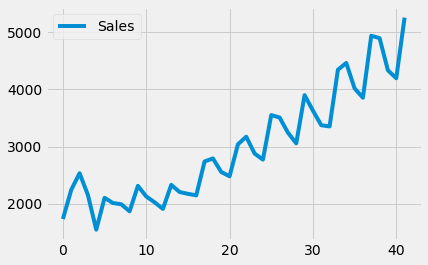

In [20]:
coco.plot()

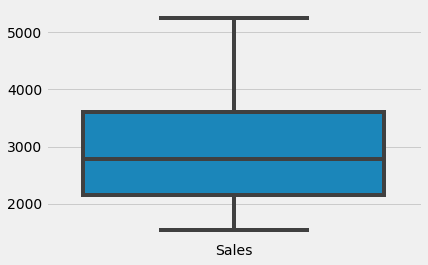

In [21]:
import seaborn as  sns
sns.boxplot(data =coco)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c098b2350>]],
      dtype=object)

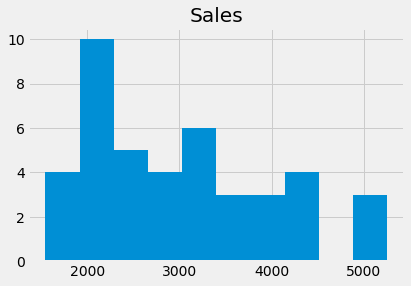

In [22]:
coco.hist()

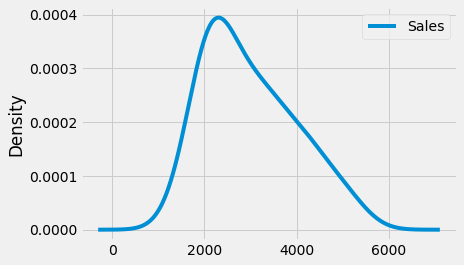

In [23]:
coco.plot(kind="kde")

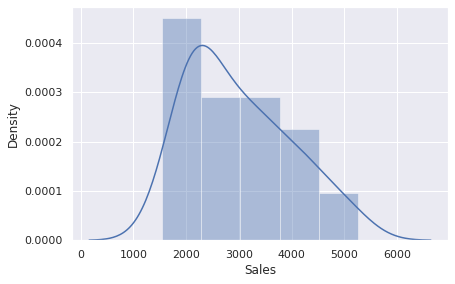

In [24]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(coco['Sales'],kde=True)

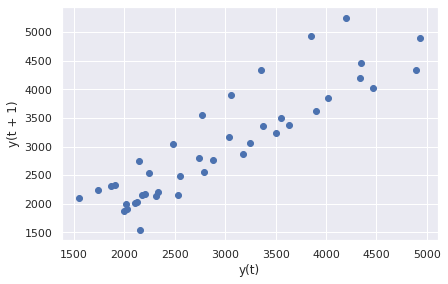

In [25]:
from pandas.plotting import lag_plot
lag_plot(coco['Sales'])

In [27]:
import plotly.express as px

In [28]:
figure = px.line(coco, x="Quarter", 
                 y="Sales", 
                 title='Quarterly Sales')

In [29]:
figure.show()

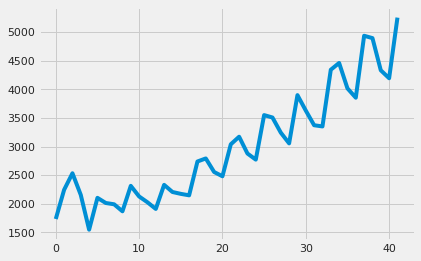

In [30]:
coco.Sales.plot()

In [31]:
coco.shape

(42, 2)

In [32]:
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [33]:
quarter=['Q1','Q2','Q3','Q4']
n=coco['Quarter'][0]

In [34]:
quarter

['Q1', 'Q2', 'Q3', 'Q4']

In [35]:
n

'Q1_86'

In [37]:
len(n)

5

In [36]:
n[0:2]

'Q1'

In [38]:
coco['quarter']=0
for i in range(42):
    n=coco['Quarter'][i]
    coco['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coco['quarter']))
    data1=pd.concat((coco,dummy),axis=1)
t= np.arange(1,43)
data1['t']=t
data1['t_square']=data1['t']*data1['t']
log_Sales=np.log(data1['Sales'])
data1['log_Sales']=log_Sales

In [39]:
data1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['quarter']= le.fit_transform(data1['quarter'])
data1['quarter']=data1['quarter']+1

In [41]:
coco = data1

In [42]:
result = seasonal_decompose(coco['Sales'], model ='multiplicative',period= 4)

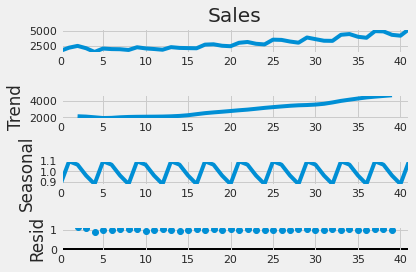

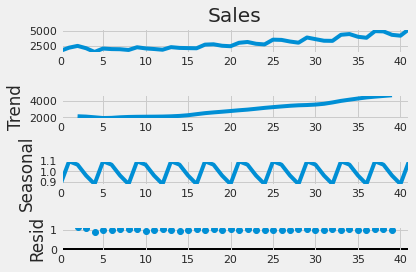

In [43]:
result.plot()

In [44]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(coco['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 3, # one Quarter = 3 momths
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[3]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=600.643, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=599.807, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.49 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=599.868, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=573.022, Time=0.82 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=560.959, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(2,1,2)[3]             : AIC=556.145, Time=1.46 sec
 ARIMA(1,1,0)(1,1,2)[3]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=inf, Time=1.20 sec
 ARIMA(2,1,0)(2,1,2)[3]             : AIC=inf, Time=1.96 sec
 ARIMA(1,1,1)(2,1,2)[3]             : AIC=557.526, Time=1.93 sec
 ARIMA(0,1,1)(2,1,2)[3]             : AIC=inf, Time=0.89 sec
 ARIMA(2,1,1)(2,1,2)[3]             : AIC=inf, Time=1.39 sec
 ARIMA(1,1,0)(

In [45]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 3)   Log Likelihood                -272.072
Date:                                Thu, 17 Nov 2022   AIC                            556.145
Time:                                        12:47:25   BIC                            565.970
Sample:                                             0   HQIC                           559.641
                                                 - 42                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4561      0.174     -2.620      0.009      -0.797      -0.115
ar.S.L3        0.0231      0.186      0.124      0.901      -0.342       0.388
ar.S.L6       -0.8840      0.073    -12.134      0.000      -1.027      -0.741
ma.S.L3       -1.2514      0.205     -6.095      0.000      -1.654      -0.849
ma.S.L6        0.6592      0.281      2.348      0.019       0.109       1.209
sigma2      6.483e+04   2.39e+04      2.714      0.007     1.8e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.69   Prob(JB):                         0.76
Heteroskedasticity (H):               0.99   Skew:                            -0.09
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# Split data into train / test sets
train = coco.iloc[:len(coco)-4]
test = coco.iloc[len(coco)-4:] # set one year(12 months) for testing
# Fit a SARIMAX(0, 1, 0)x(0, 1, 0, 12) on the training set

In [47]:
# Fit a SARIMAX(0, 1, 0)x(0, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model = SARIMAX(train['Sales'],order = (1, 1, 0), seasonal_order =(2, 1, [1, 2], 3))

In [49]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  Sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 0)x(2, 1, [1, 2], 3)   Log Likelihood                -245.360
Date:                                Thu, 17 Nov 2022   AIC                            502.719
Time:                                        12:48:11   BIC                            511.877
Sample:                                             0   HQIC                           505.842
                                                 - 38                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4225      0.211     -2.004      0.045      -0.836      -0.009
ar.S.L3        0.0352      0.220      0.160      0.873      -0.396       0.466
ar.S.L6       -0.8488      0.095     -8.929      0.000      -1.035      -0.662
ma.S.L3       -1.2617      0.232     -5.435      0.000      -1.717      -0.807
ma.S.L6        0.6243      0.311      2.006      0.045       0.014       1.234
sigma2      7.273e+04   2.94e+04      2.475      0.013    1.51e+04     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.62   Prob(JB):                         0.81
Heteroskedasticity (H):               0.95   Skew:                            -0.06
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1

In [51]:
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

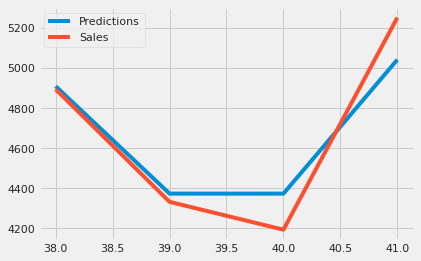

In [52]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [53]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [54]:
# Calculate root mean squared error
rmse(test["Sales"], predictions)

140.05557171059948

In [55]:
#Forecast using SARIMA Model
# Train the model on the full dataset
model = SARIMAX(coco['Sales'],order = (1, 1, 0), seasonal_order =(2, 1, [1, 2], 3))

In [56]:
result = model.fit()

In [57]:
# Forecast for the next 5 years
forecast = result.predict(start = len(coco), 
                          end = (len(coco)-1) + 5 * 4, 
                          typ = 'levels').rename('Forecast')

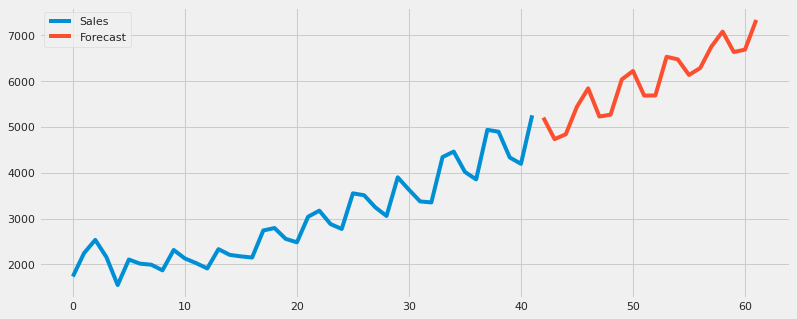

In [58]:
# Plot the forecast values
coco['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)